# Lending Club Case Study

## Introduction
You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

&emsp;**1 Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

&emsp;**2 Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as &emsp;'defaulted'.

&emsp;**3 Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted** on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset) 

## Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to identify the risky loan applicants at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

## Exploratory Data Analysis

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv("./loan.csv",dtype='unicode')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [3]:
print(df.shape)
print(df.info())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
None


In [4]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

## Data Cleaning
Let us begin with cleaning the data set

#### Removing customer behaviour variables and columns with 100% null values

In [5]:
#Removing customer behaviour variables
df = df.drop(['id','emp_title','mths_since_last_record','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'total_rec_late_fee','recoveries','collection_recovery_fee',
'last_pymnt_d','last_pymnt_amnt', 'last_credit_pull_d','application_type','next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc',
  'tot_hi_cred_lim', 'total_bal_ex_mort' ,'total_bc_limit', 'total_il_high_credit_limit'], axis = 1)

#removing columns with 100% null values
df = df.dropna(axis=1, how='all')

round(100*(df.isnull().sum()/len(df.index)), 2)

member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
initial_list_status           0.00
collections_12_mths_ex_med    0.14
policy_code                   0.00
acc_now_delinq                0.00
chargeoff_within_12_mths      0.14
delinq_amnt                   0.00
pub_rec_bankruptcies

#### Imputing null values for following columns

In [6]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])
df['tax_liens'] = df['tax_liens'].fillna(df['tax_liens'].mode()[0])
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(df['chargeoff_within_12_mths'].mode()[0])
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])

In [7]:
round(100*(df.isnull().sum()/len(df.index)), 2)

member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
initial_list_status           0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
chargeoff_within_12_mths      0.0
delinq_amnt                   0.0
pub_rec_bankruptcies          0.0
tax_liens     

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   member_id                   39717 non-null  object
 1   loan_amnt                   39717 non-null  object
 2   funded_amnt                 39717 non-null  object
 3   funded_amnt_inv             39717 non-null  object
 4   term                        39717 non-null  object
 5   int_rate                    39717 non-null  object
 6   installment                 39717 non-null  object
 7   grade                       39717 non-null  object
 8   sub_grade                   39717 non-null  object
 9   emp_length                  39717 non-null  object
 10  home_ownership              39717 non-null  object
 11  annual_inc                  39717 non-null  object
 12  verification_status         39717 non-null  object
 13  issue_d                     39717 non-null  ob

In [9]:
df.term                        

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

As we see all the columns required for analysis are in object form, lets change the columns with numbers to numeric values float or int depending on reuirement

In [10]:
df.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [11]:
#converting data types to int and float
df['member_id'] = df['member_id'].apply(lambda x: int(x))
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: float(x))
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: float(x))
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: float(x))
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.split('%')[0]))
df['installment'] = df['installment'].apply(lambda x: float(x))
df['annual_inc'] = df['annual_inc'].apply(lambda x: float(x))
df['term_months']=df['term'].apply(lambda x: str(x.split(' ')[1]))
df['term_months'] = df['term_months'].astype('int64')

#### Creating derived columns

In [12]:
df.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

Let us analyse year and month separately having dillerent columns

In [13]:
# First convert issue_d colun to datetime type
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [14]:
# extracting month and year from issue_date
df['issue_month'] = df['issue_d'].apply(lambda x: x.month)
df['issue_year'] = df['issue_d'].apply(lambda x: x.year)

In [15]:
df['emp_exp']=df['emp_length'].apply(lambda x : re.findall('\d+',str(x))[0])
df["emp_exp"] = df["emp_exp"].apply(lambda x:int(x))

In [16]:
df['emp_exp']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_exp, Length: 39717, dtype: int64

### Univariate Analysis 


#### 1 Loan ststus 
Loan ststus will act as result variable

In [17]:
df.groupby(['loan_status']).size().reset_index(name='count')

,loan_status,count
0,Charged Off,5627
1,Current,1140
2,Fully Paid,32950


Current loan status will eventually become as fully paid or Charged off so we can neglect it for now

In [18]:
# Removing loan status as current because it is not required in analysis 
df = df[df.loan_status != 'Current']

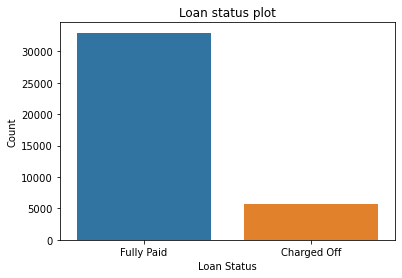

In [19]:
sns.countplot(x= df['loan_status'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan status plot')
plt.show()

In [20]:
round(df['loan_status'].value_counts(normalize=True) * 100)

Fully Paid     85.0
Charged Off    15.0
Name: loan_status, dtype: float64

The above count shows that 85% loans are fully paid, only 15% customers are defaulters

The loan amount is amount requested by borrwoer to Lending club

#### 2 Loan Amount

In [21]:
df.loan_amnt

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64

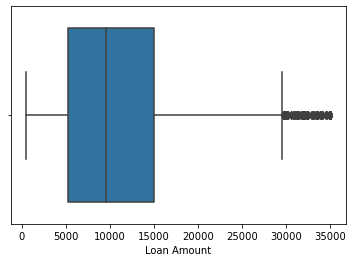

In [22]:
sns.boxplot(x = df['loan_amnt'])
plt.xlabel('Loan Amount')
plt.show()


The box plot shows that the loan amount varies from 0 to 35,000 having median of 10,000

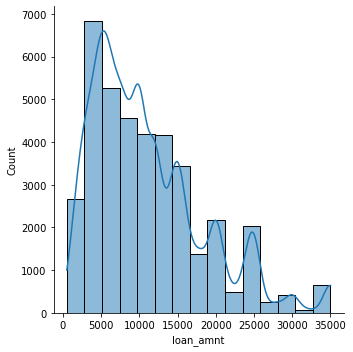

In [23]:
sns.displot(df['loan_amnt'],bins=15,kde=True)
plt.show()

In [24]:
Q1 = df['loan_amnt'].quantile(0.25) #5300.0
Q3 = df['loan_amnt'].quantile(0.75) #15000.0
IQR = Q3 - Q1
IQR

9700.0

In [25]:
lower_limit = Q1 - 1.5 * IQR 
upper_limit = Q3 + 1.5 * IQR

In [26]:
lower_limit

-9250.0

In [27]:
upper_limit

29550.0

#### 3 Funded Amount

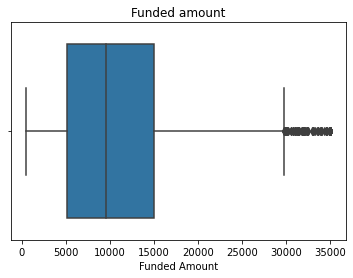

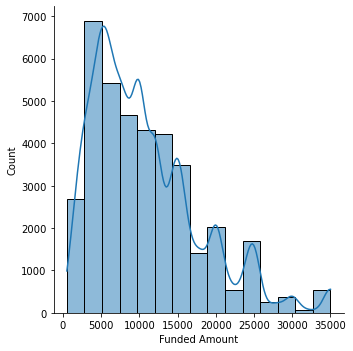

In [28]:
sns.boxplot(x = df.funded_amnt)
plt.xlabel('Funded Amount')
plt.title('Funded amount')
plt.show()
sns.displot(df['funded_amnt'], bins=15,kde=True)
plt.xlabel('Funded Amount')
plt.show()

There is a lot similarity between loan amount and funded amount shows that around every requirement has be funded to at least upto 90%

#### 4 Grade

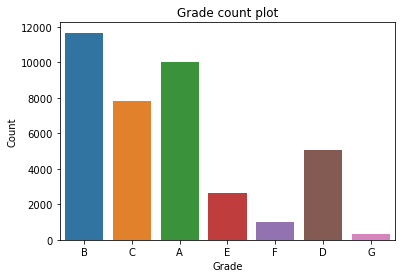

In [29]:
sns.countplot(x = 'grade', data = df)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade count plot')
plt.show()

The plot shows that most loans are B and A grade.

#### 5 Annual income

In [30]:
df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Convert anual income in lakh

In [31]:
df['annual_inc_lakhs'] = df['annual_inc'] / 1000000

In [32]:
df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### 6 Annual income in lakhs

In [33]:
df['annual_inc_lakhs'].describe()

count    38577.000000
mean         0.068778
std          0.064219
min          0.004000
25%          0.040000
50%          0.058868
75%          0.082000
max          6.000000
Name: annual_inc_lakhs, dtype: float64

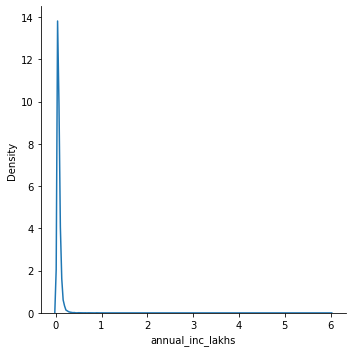

In [34]:
sns.displot( x=df.annual_inc_lakhs, kind="kde")
plt.show()

The annual income plot shows that most applicants have income less that 1 lakh, but we sure have few applicant with uptp 6 lakhs as annual income

#### 7. Issue year 

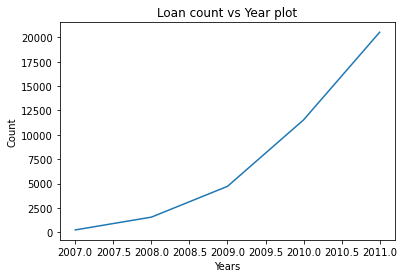

In [35]:
df['issue_year'].value_counts().plot()
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Loan count vs Year plot')
plt.show()

The increase in loan count over years shows that increase in business of lending club.

#### 8. Interest Rate

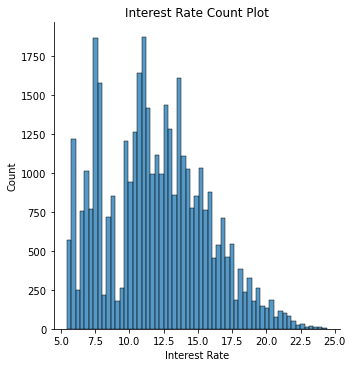

In [36]:
sns.displot(df.int_rate)
plt.xlabel('Interest Rate')
plt.title('Interest Rate Count Plot')
plt.show()

We see that intrest rate varries on a range of 5 to 25, but most applicants are at 7.5 to 11

#### 9. Address

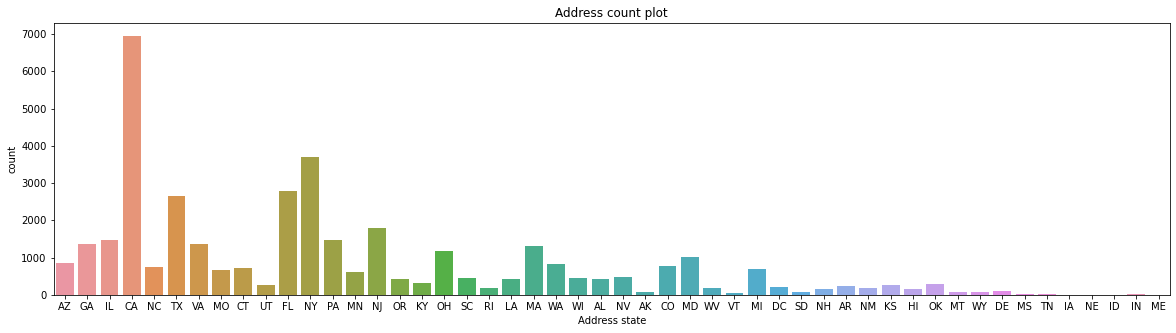

In [37]:
plt.figure(figsize=(20, 5))
sns.countplot(x='addr_state',data=df)
plt.xlabel('Address state')
plt.title('Address count plot')
plt.show()

The address plot clearly shows that most of applicants are from 'CA'

#### 10. Purpose

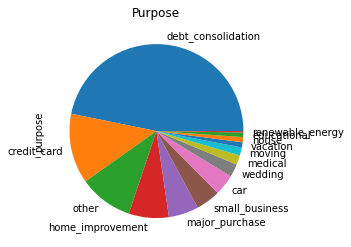

In [38]:
df['purpose'].value_counts().plot.pie()
plt.title("Purpose")
plt.show()

The most commonn purpose for loan is Det consolidation

## Bivariate Analysis

#### 1. Address state and Loan status

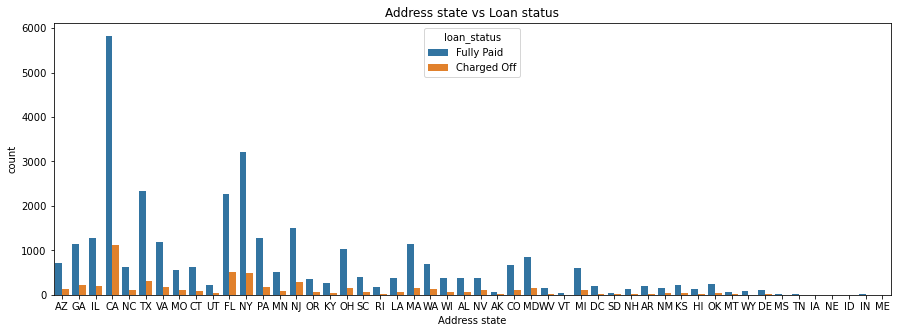

In [39]:
plt.figure(figsize=(15, 5))
sns.countplot(x='addr_state',hue='loan_status',data=df)
plt.title('Address state vs Loan status')
plt.xlabel('Address state')
plt.show()

Shows that people form CA, FL and NY have more numbers of defaulters, but FL and NY charged off to fully paid ratio is more than CA. This clearly indicates that FL and NY has most charged off applicants  

#### 2. Interest rate and Loan status

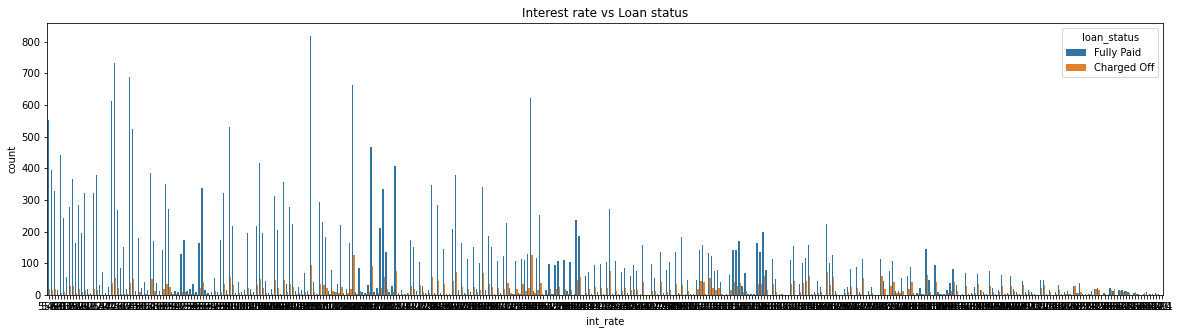

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(x='int_rate',hue = 'loan_status',data = df)
plt.title('Interest rate vs Loan status')
plt.show()

Higher interest rate has very less defaulters, whereas mid range form 7- 10 have more

#### 3. Grade and loan status 

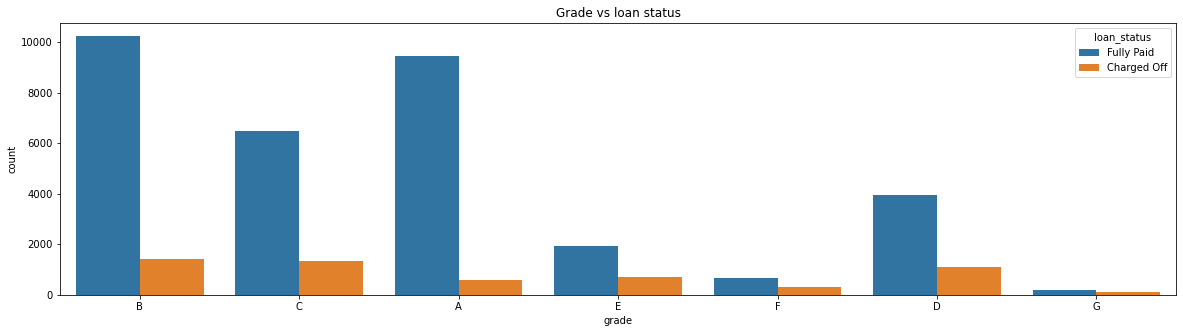

In [41]:
plt.figure(figsize=(20,5))
sns.countplot(x='grade',hue = 'loan_status',data = df)
plt.title('Grade vs loan status')
plt.show()

Grade B,Cand D have significantly higher numbers of charged off applicants

#### 4. Sub grade and loan status

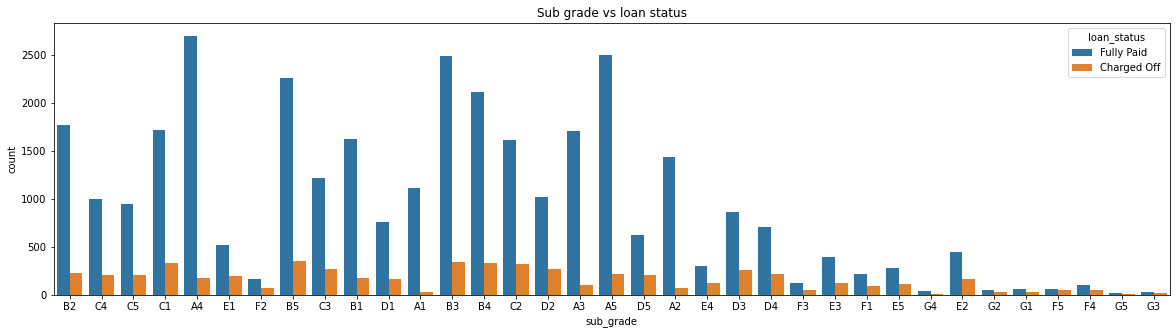

In [42]:
plt.figure(figsize=(20,5))
sns.countplot(x='sub_grade',hue = 'loan_status',data = df)
plt.title('Sub grade vs loan status')
plt.show()

#### 5. Interest rate and employee length

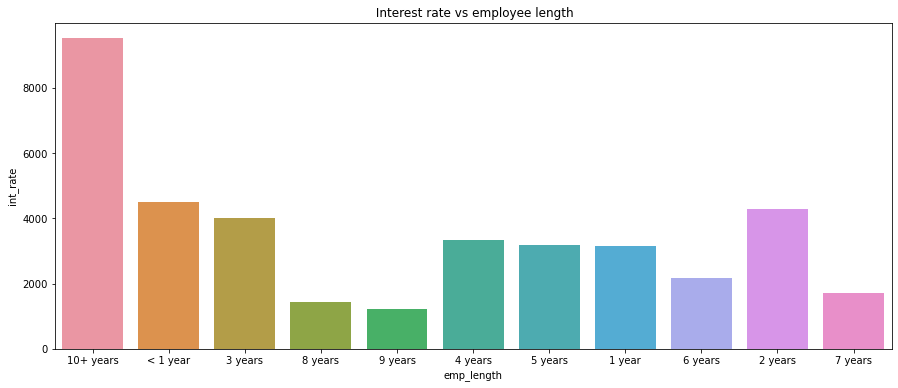

In [43]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df,x='emp_length', y='int_rate',estimator=len)
plt.title(' Interest rate vs employee length')
plt.show()

Employees with more than 10 years have high interest rate as compare to others.

#### 6. Home ownership and loan status

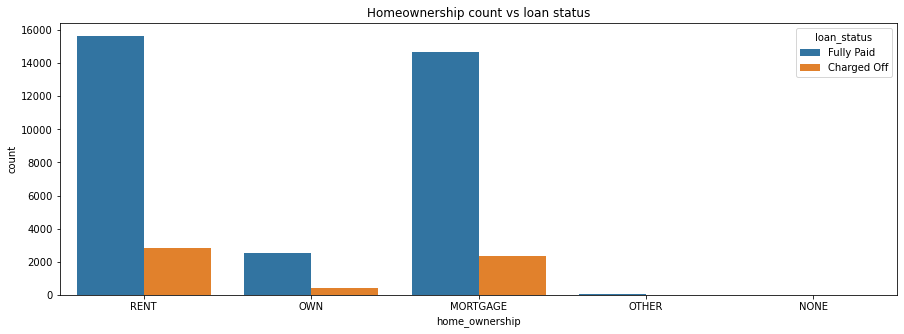

In [44]:
plt.figure(figsize=(15, 5))
sns.countplot(x='home_ownership',hue='loan_status',data=df)
plt.title('Homeownership count vs loan status')
plt.show()

### Multivariate analysis

#### 1. Loan status, annual income and grade

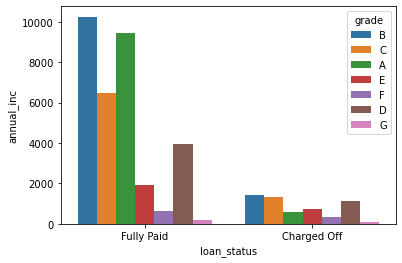

In [45]:
sns.barplot(data=df,x='loan_status', y='annual_inc',estimator=len, hue='grade')
plt.show()

#### 2. Corelation plot

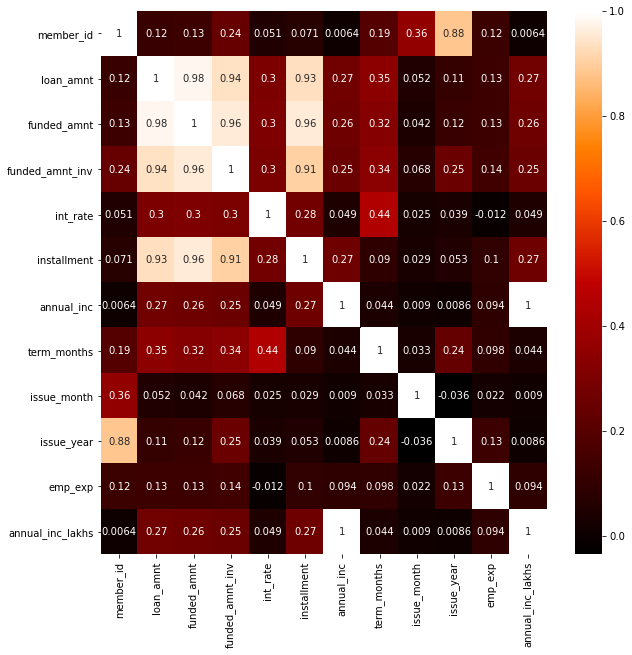

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='gist_heat')
plt.show()

#### 3. Employee length and interest rate

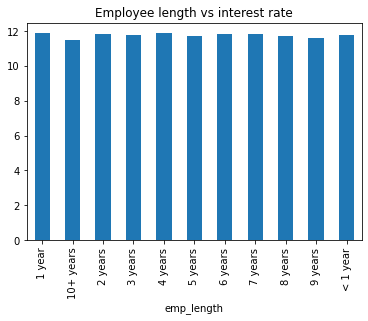

In [47]:
df.groupby(['emp_length'])['int_rate'].median().plot(x=df.int_rate,kind='bar')
plt.title('Employee length vs interest rate')
plt.show()

#### 4. Relation between Loan amount, funded amount and funded amount investment

<Figure size 1080x1080 with 0 Axes>

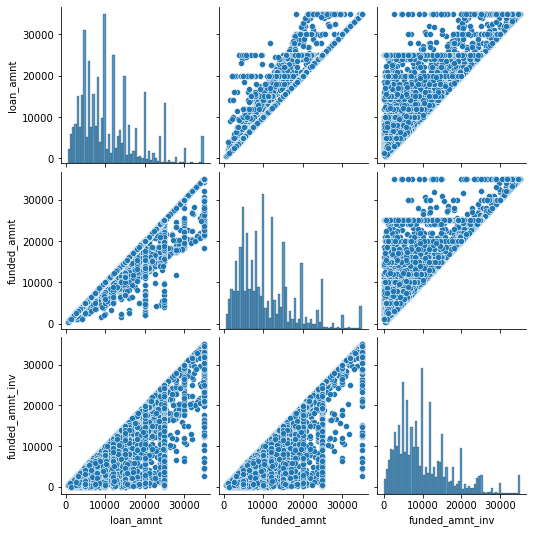

In [48]:
plt.figure(figsize=[15,15])
sns.pairplot(df[['loan_amnt', 'funded_amnt','funded_amnt_inv']])
plt.show()

#### 5. Relation between loan amount and income verification status

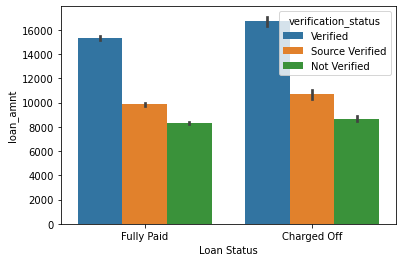

In [49]:
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=df)
plt.xlabel("Loan Status")
plt.show()

# Thank You